<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/Reasearch_paper_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=36430c2d7bef0764720d2610474e97c60fe951cb497d1d15e16e407b1473cd63
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.2740731707317074


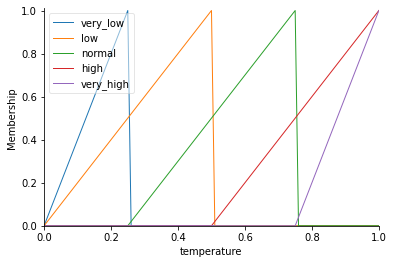

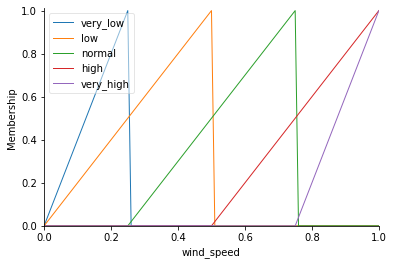

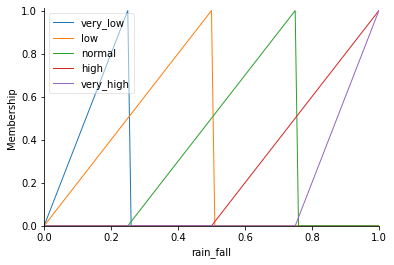

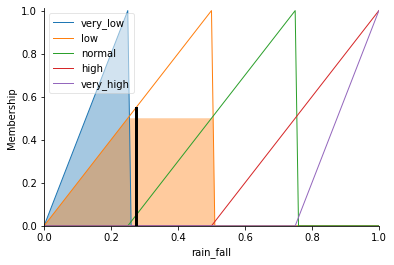

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#data for fuzzy logic 
wind_speed=ctrl.Antecedent(np.arange(0,1.01,0.01),'wind_speed')
temperature=ctrl.Antecedent(np.arange(0,1.01,0.01),'temperature')
rain_fall=ctrl.Consequent(np.arange(0,1.01,0.01),'rain_fall')
#--------temperature--------
temperature['very_low']=fuzz.trimf(temperature.universe,[0,0.25,0.25])
temperature['low']=fuzz.trimf(temperature.universe,[0,0.5,0.5])
temperature['normal']=fuzz.trimf(temperature.universe,[0.25,0.75,0.75])
temperature['high']=fuzz.trimf(temperature.universe,[0.5,1,1])
temperature['very_high']=fuzz.trimf(temperature.universe,[0.75,1,1])
temperature.view()

#-----------wind_speed---------
wind_speed['very_low']=fuzz.trimf(wind_speed.universe,[0,0.25,0.25])
wind_speed['low']=fuzz.trimf(wind_speed.universe,[0,0.5,0.5])
wind_speed['normal']=fuzz.trimf(wind_speed.universe,[0.25,0.75,0.75])
wind_speed['high']=fuzz.trimf(wind_speed.universe,[0.5,1,1])
wind_speed['very_high']=fuzz.trimf(wind_speed.universe,[0.75,1,1])
wind_speed.view()

#-----------rain_fall---------------
rain_fall['very_low']=fuzz.trimf(rain_fall.universe,[0,0.25,0.25])
rain_fall['low']=fuzz.trimf(rain_fall.universe,[0,0.5,0.5])
rain_fall['normal']=fuzz.trimf(rain_fall.universe,[0.25,0.75,0.75])
rain_fall['high']=fuzz.trimf(rain_fall.universe,[0.5,1,1])
rain_fall['very_high']=fuzz.trimf(rain_fall.universe,[0.75,1,1])
rain_fall.view()

#------Rule for fuzzy-logic---------
rule1 = ctrl.Rule(wind_speed['very_low'] & temperature['very_low'], rain_fall['very_low'])                             
rule2 = ctrl.Rule(wind_speed['very_low'] & temperature['low'], rain_fall['very_low'])
rule3 = ctrl.Rule(wind_speed['very_low'] & temperature['normal'], rain_fall['low'])
rule4 = ctrl.Rule(wind_speed['very_low'] & temperature['high'], rain_fall['low'])
rule5 = ctrl.Rule(wind_speed['very_low'] & temperature['very_high'], rain_fall['low'])

rule6 = ctrl.Rule(wind_speed['low'] & temperature['very_low'], rain_fall['very_low'])                                        
rule7 = ctrl.Rule(wind_speed['low'] & temperature['low'], rain_fall['very_low'])                                    
rule8 = ctrl.Rule(wind_speed['low'] & temperature['normal'], rain_fall['low'])
rule9 = ctrl.Rule(wind_speed['low'] & temperature['high'], rain_fall['low'])
rule10 = ctrl.Rule(wind_speed['low'] & temperature['very_high'], rain_fall['normal'])

rule11 = ctrl.Rule(wind_speed['normal'] & temperature['very_low'], rain_fall['very_low'])
rule12 = ctrl.Rule(wind_speed['normal'] & temperature['low'], rain_fall['low'])
rule13 = ctrl.Rule(wind_speed['normal'] & temperature['normal'], rain_fall['normal'])
rule14 = ctrl.Rule(wind_speed['normal'] & temperature['high'], rain_fall['normal'])
rule15 = ctrl.Rule(wind_speed['normal'] & temperature['very_high'], rain_fall['high'])

rule16 = ctrl.Rule(wind_speed['high'] & temperature['very_low'], rain_fall['low'])
rule17 = ctrl.Rule(wind_speed['high'] & temperature['low'], rain_fall['normal'])
rule18 = ctrl.Rule(wind_speed['high'] & temperature['normal'], rain_fall['normal'])
rule19 = ctrl.Rule(wind_speed['high'] & temperature['high'], rain_fall['high'])
rule20 = ctrl.Rule(wind_speed['high'] & temperature['very_high'], rain_fall['high'])                                       

rule21 = ctrl.Rule(wind_speed['very_high'] & temperature['very_low'], rain_fall['normal'])
rule22 = ctrl.Rule(wind_speed['very_high'] & temperature['low'], rain_fall['normal'])
rule23 = ctrl.Rule(wind_speed['very_high'] & temperature['normal'], rain_fall['high'])                                    
rule24 = ctrl.Rule(wind_speed['very_high'] & temperature['high'], rain_fall['very_high'])
rule25 = ctrl.Rule(wind_speed['very_high'] & temperature['very_high'], rain_fall['very_high'])                             


rain_ctrl =ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rain_fall_predict=ctrl.ControlSystemSimulation(rain_ctrl)
rain_fall_predict.input['temperature']= 0.5
rain_fall_predict.input['wind_speed']=0.25
rain_fall_predict.compute()
print(rain_fall_predict.output['rain_fall'])
rain_fall.view(sim=rain_fall_predict)

